In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
from ipywidgets import interact, IntSlider
from tqdm import tqdm

import matplotlib as mpl

import planet_methods as pm

Updated module 2025-04-03 12:07:02.447439


In [3]:
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                      'figure.figsize': (6.4, 4.8),
                      # 'figure.figsize': (4, 3.8),
                      'xtick.direction': 'in',
                      'ytick.direction': 'in'
                    })

In [5]:
rj = 0.102763  # rsun
mj = 0.000954588  # msun

In [29]:
planet1 = pm.model('./LOGS_10mj_5rj_mdot0')

Creating model from directory ./LOGS_10mj_5rj_mdot0
Loading Profiles: 


100%|██████████| 92/92 [00:00<00:00, 157.89it/s]


In [6]:
p2 = pm.model('./LOGS_1mj_5rj_mdot_1e-8mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_1e-8mj_per_year
Loading Profiles: 


100%|██████████| 14/14 [00:00<00:00, 29.67it/s]


In [7]:
p3 = pm.model('./LOGS_1mj_5rj_mdot_1e-7mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_1e-7mj_per_year
Loading Profiles: 


100%|██████████| 21/21 [00:00<00:00, 78.44it/s]


In [10]:
p4 = pm.model('./LOGS_1mj_5rj_mdot_1e-9mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_1e-9mj_per_year
Loading Profiles: 


100%|██████████| 10/10 [00:00<00:00, 162.58it/s]


Text(0, 0.5, '$T_\\mathrm{eff}$ (K)')

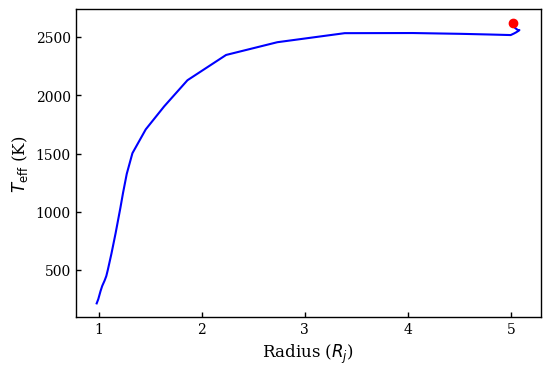

In [30]:
plt.plot(10**planet1.DF['log_R'] / rj, 10**planet1.DF['log_Teff'], color='blue')
plt.scatter(10**planet1.DF['log_R'].iloc[0] / rj, 10**planet1.DF['log_Teff'].iloc[0], color='red', zorder=10)
plt.xlabel(r'Radius ($R_j$)')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')

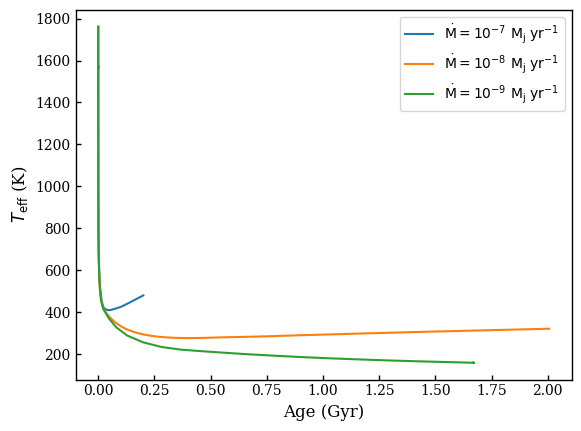

In [26]:
plt.plot(10**-9 * p3.DF['star_age'], 10**p3.DF['log_Teff'], label=r'$\dot{\mathrm{M}} = 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p2.DF['star_age'], 10**p2.DF['log_Teff'], label=r'$\dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p4.DF['star_age'], 10**p4.DF['log_Teff'], label=r'$\dot{\mathrm{M}} = 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.xlabel('Age (Gyr)')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')
plt.legend()

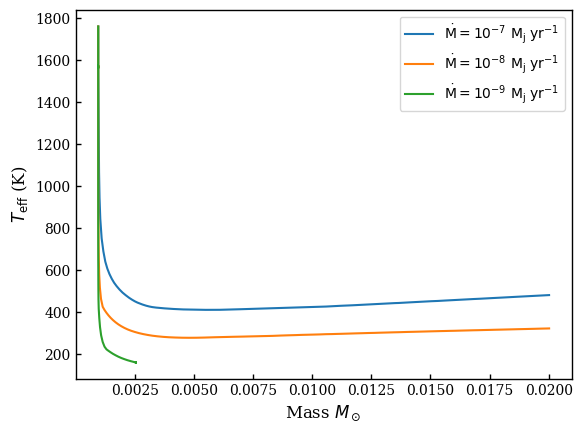

In [31]:
plt.plot(p3.DF['star_mass'], 10**p3.DF['log_Teff'], label=r'$\dot{\mathrm{M}} = 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p2.DF['star_mass'], 10**p2.DF['log_Teff'], label=r'$\dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p4.DF['star_mass'], 10**p4.DF['log_Teff'], label=r'$\dot{\mathrm{M}} = 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.xlabel(r'Mass $M_\odot$')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')
plt.legend()

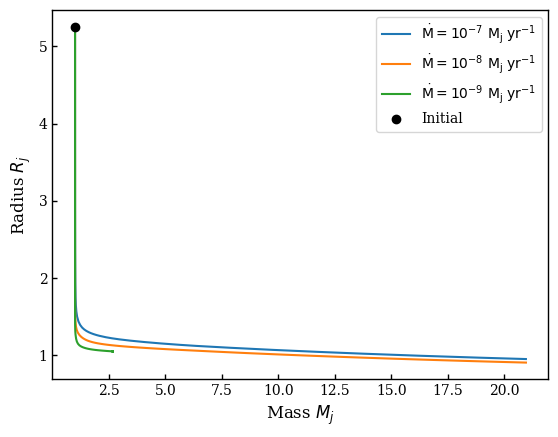

In [38]:
plt.plot(p3.DF['star_mass'] /mj, 10**p3.DF['log_R'] / rj, label=r'$\dot{\mathrm{M}} = 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p2.DF['star_mass'] /mj, 10**p2.DF['log_R'] / rj, label=r'$\dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p4.DF['star_mass'] /mj, 10**p4.DF['log_R'] / rj, label=r'$\dot{\mathrm{M}} = 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.scatter(p2.DF['star_mass'].iloc[0] / mj, 10**p2.DF['log_R'].iloc[0] / rj, color='black', zorder=10, label='Initial')

plt.xlabel(r'Mass $M_j$')
plt.ylabel(r'Radius $R_j$')
plt.legend()
plt.legend()